In [1]:
import pymongo as pm
import pandas as pd
from transactions import get_event_transactions
from transactions_cleaner import remove_cancelled_orders
import numpy as np

In [2]:
def get_event_hist_data(event_id):
    client = pm.MongoClient("localhost", 27017)
    db = client.tradex_strat_data
    collection = db[f"strat7_{event_id}"]
    cursor = collection.find({"_id" : { "$ne" : "info"},
                             },{"_id":0})
    df = pd.DataFrame(cursor)
    return df

In [102]:
data_df_raw = get_event_hist_data(12177)

In [85]:
data_df_raw

,timestamp,side_2_scalp,spot_price,strike_price,atr_value,yesfp,nofp,yesbp,nobp,yesabp,noabp,yesholdqty,noholdqty,orders
0,2022-11-17 15:23:39.420,N,16504,16650,355.148112,29.856292,70.143708,27.0,30.0,0.000000,0.000000,0.0,0.0,"[{'index': 0, 'status': 'pending', 'price': 31..."
1,2022-11-17 15:26:05.177,N,16510,16650,355.148112,30.684115,69.315885,27.0,43.0,0.000000,0.000000,0.0,0.0,"[{'index': 0, 'status': 'pending', 'price': 44..."
2,2022-11-17 15:28:27.257,N,16525,16650,355.148112,32.753674,67.246326,40.0,59.0,0.000000,0.000000,0.0,0.0,"[{'index': 0, 'status': 'pending', 'price': 59..."
3,2022-11-17 15:30:41.375,N,16524,16650,355.148112,32.615704,67.384296,40.0,59.0,0.000000,0.000000,0.0,0.0,"[{'index': 0, 'status': 'pending', 'price': 59..."
4,2022-11-17 15:33:05.851,N,16522,16650,355.148112,32.339763,67.660237,27.0,59.0,0.000000,0.000000,0.0,0.0,"[{'index': 0, 'status': 'pending', 'price': 60..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2022-11-17 22:51:23.032,Y,16658,16650,66.175601,55.923633,44.076367,51.0,48.0,25.180000,61.380952,0.0,0.0,"[{'index': 1, 'status': 'pending', 'price': 51..."
206,2022-11-17 22:53:23.776,Y,16646,16650,67.194173,47.083080,52.916920,24.0,71.0,25.686275,61.380952,8.0,0.0,[]
207,2022-11-17 22:55:27.055,Y,16641,16650,41.044448,39.255550,60.744450,28.0,71.0,25.686275,61.380952,0.0,0.0,"[{'index': 1, 'status': 'pending', 'price': 28..."
208,2022-11-17 22:57:32.752,N,16640,16650,29.559523,33.423278,66.576722,35.0,64.0,25.730769,61.380952,1.0,0.0,"[{'index': 0, 'status': 'pending', 'price': 64..."


In [69]:
data_df_raw["yesfp"] = pd.DataFrame.from_records(data_df_raw["fair_price"])["yesfp"]
data_df_raw["nofp"] = pd.DataFrame.from_records(data_df_raw["fair_price"])["nofp"]
data_df_raw["yesbp"] = pd.DataFrame.from_records(data_df_raw["best_price"])["yesbp"]
data_df_raw["nobp"] = pd.DataFrame.from_records(data_df_raw["best_price"])["nobp"]
data_df_raw["yesabp"] = pd.DataFrame.from_records(data_df_raw["avg_buy"])["yesabp"]
data_df_raw["noabp"] = pd.DataFrame.from_records(data_df_raw["avg_buy"])["noabp"]

KeyError: 'fair_price'

<AxesSubplot:>

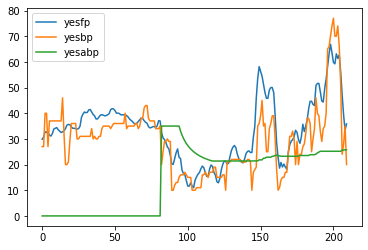

In [83]:
data_df_raw[["yesfp","yesbp","yesabp"]].plot()

<AxesSubplot:>

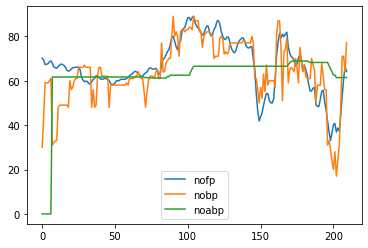

In [84]:
data_df_raw[["nofp","nobp","noabp"]].plot()

In [55]:
for i in data_df_raw["orders"]:
    print(i)

[{'index': 0, 'status': 'pending', 'price': 24, 'asset': 'N', 'userid': 603727, 'qty': 15, 'orderid': 'od_SJqowgHR', 'side': 'buy', 'createdat': datetime.datetime(2022, 11, 16, 10, 13, 38, 765000), 'buyprice': 24}]
[{'index': 0, 'status': 'pending', 'price': 25, 'asset': 'N', 'userid': 603727, 'qty': 15, 'orderid': 'od_dw7si0YY', 'side': 'buy', 'createdat': datetime.datetime(2022, 11, 16, 10, 14, 43, 865000), 'buyprice': 25}]
[{'index': 0, 'status': 'pending', 'price': 26, 'asset': 'N', 'userid': 603727, 'qty': 15, 'orderid': 'od_l1rCbUaB', 'side': 'buy', 'createdat': datetime.datetime(2022, 11, 16, 10, 16, 51, 631000), 'buyprice': 26}]
[{'index': 0, 'status': 'pending', 'price': 27, 'asset': 'N', 'userid': 603727, 'qty': 15, 'orderid': 'od_IPPLEJeH', 'side': 'buy', 'createdat': datetime.datetime(2022, 11, 16, 10, 18, 57, 362000), 'buyprice': 27}]
[{'index': 0, 'status': 'pending', 'price': 28, 'asset': 'N', 'userid': 603727, 'qty': 15, 'orderid': 'od_KEclRugs', 'side': 'buy', 'created

In [103]:
df2 = data_df_raw
df2 = df2.set_index("timestamp")

In [104]:
df2["upper"] = df2["spot_price"]+df2["atr_value"]
df2["lower"] = df2["spot_price"]-df2["atr_value"]

<AxesSubplot:xlabel='timestamp'>

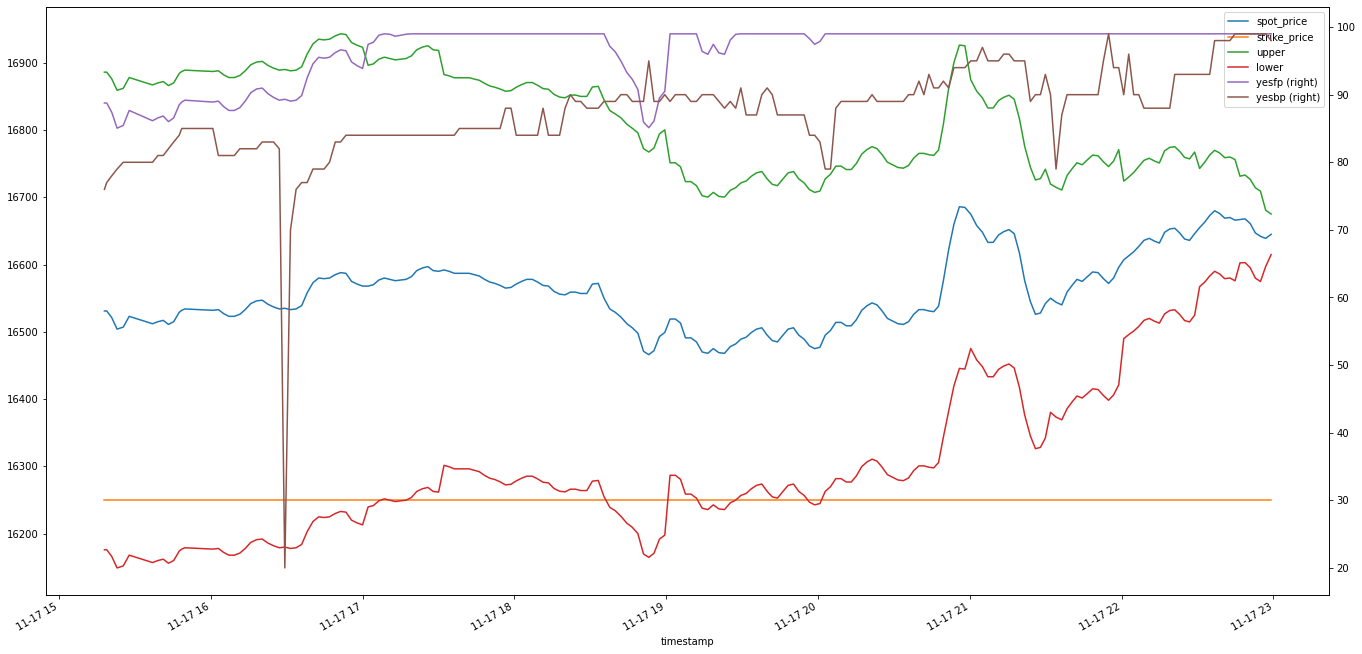

In [105]:
df2[["spot_price","strike_price","upper","lower","yesfp","yesbp"]].plot(figsize=(23,12),secondary_y=["yesfp","yesbp"])

Amount sum matches
12177 fair price std dev 4.109013420425957
12177 best price std dev 7.076868789971678
Amount sum matches
12178 fair price std dev 14.711915745089163
12178 best price std dev 16.205718171813757
Amount sum matches
12179 fair price std dev 12.041286373038545
12179 best price std dev 12.749778298547383
Amount sum matches
12180 fair price std dev 3.7255795801110363
12180 best price std dev 7.850525512863402
Amount sum matches
12230 fair price std dev 0.9460479496879051
12230 best price std dev 6.328436999227794
Amount sum matches
12231 fair price std dev 20.90736040279628
12231 best price std dev 18.435709311186343
Amount sum matches
12232 fair price std dev 13.64014483067854
12232 best price std dev 16.257531136456404
Amount sum matches
12233 fair price std dev 0.1415013746677473
12233 best price std dev 7.249321908061653


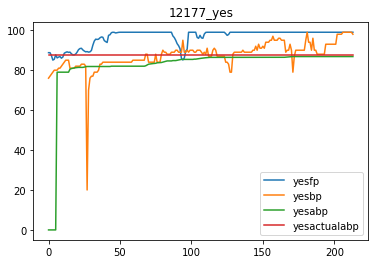

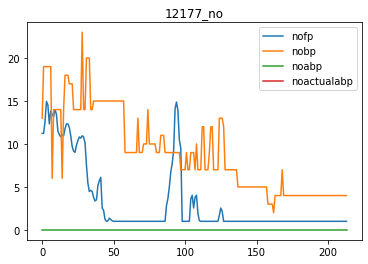

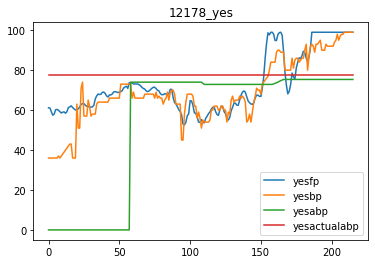

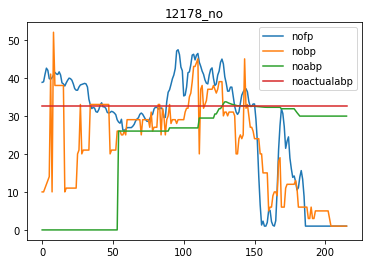

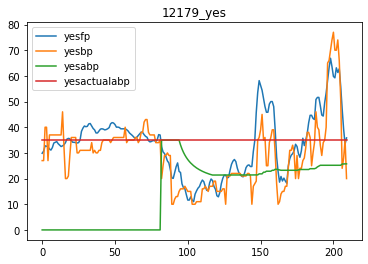

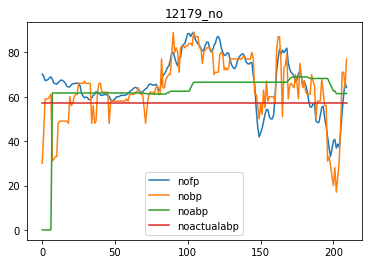

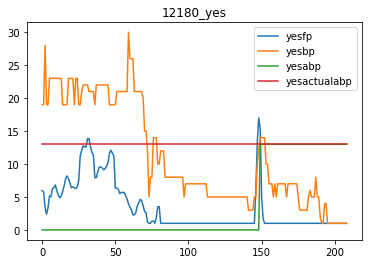

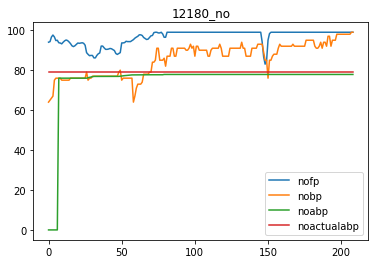

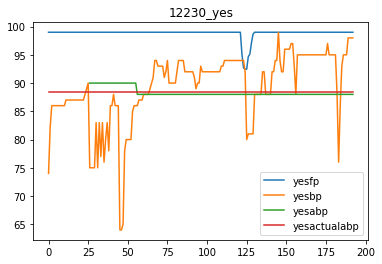

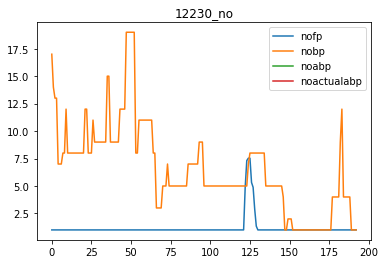

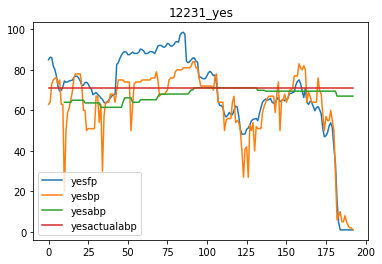

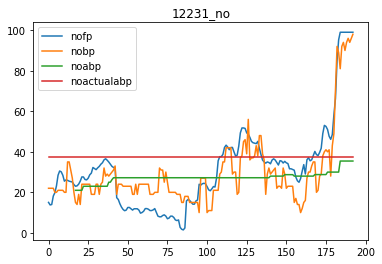

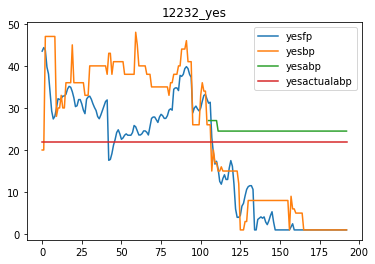

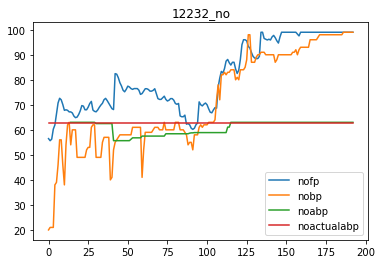

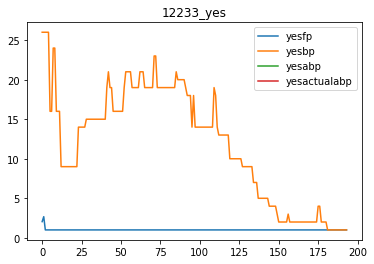

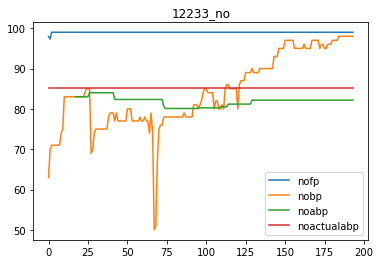

In [4]:
eids = [12177, 12178, 12179, 12180,12230,12231,12232,12233]
for eid in eids:
    data_df_raw = get_event_hist_data(eid)
    txn_data = get_event_transactions(eid)
    clean_df = remove_cancelled_orders(txn_data)
    mask_buy = clean_df["status"] == "Bought"
    mask_yes = clean_df["asset"] == "Y"
    df_yesbuy = clean_df[mask_buy & mask_yes]
    avgbuyyes = (df_yesbuy["price"] * df_yesbuy["qty"]).sum() / df_yesbuy["qty"].sum()

    mask_no = clean_df["asset"] == "N"
    df_nobuy = clean_df[mask_buy & mask_no]
    avgbuyno = (df_nobuy["price"] * df_nobuy["qty"]).sum() / df_nobuy["qty"].sum()
    
    data_df_raw["yesactualabp"] = avgbuyyes
    data_df_raw["noactualabp"] = avgbuyno
    data_df_raw[["yesfp","yesbp","yesabp","yesactualabp"]].plot(title=f"{eid}_yes")
    data_df_raw[["nofp","nobp","noabp","noactualabp"]].plot(title=f"{eid}_no")
    
    print(eid,"fair price std dev",data_df_raw["yesfp"].std())
    print(eid,"best price std dev",data_df_raw["yesbp"].std())

# Rough

In [124]:
dict1 = {}
df1 = pd.DataFrame(dict1)

dict1 = {"asset":[],
        "status":[],
         "price":[]}
df2 = pd.DataFrame(dict1)

dict1 = {"asset":["N","N","N"],
        "status":["sold","buy","cancel"],
         "price":[54,86,89]}
df3 = pd.DataFrame(dict1)

dict1 = {"asset":["N","N","N"],
        "status":["cancel","buy","cancel"],
         "price":[54,86,89]}
df4 = pd.DataFrame(dict1)

dict1 = {"asset":["Y","N","N"],
        "status":["cancel","buy","cancel"],
         "price":[54,86,89]}
df5 = pd.DataFrame(dict1)

dict1 = {"asset":["Y","N","N"],
        "status":["sold","buy","sold"],
         "price":[54,86,89]}
df6 = pd.DataFrame(dict1)

In [125]:
df = df6
mask = (df["status"] == "sold") & (df["asset"] == "Y")

In [126]:
df[mask]

,asset,status,price
0,Y,sold,54


In [137]:
eids = [12146, 12147, 12148, 12149, 12177, 12178, 12179, 12180]
df_all = pd.DataFrame()
for eid in eids:
    data_df_raw = get_event_hist_data(eid)
    if "yesfp" not in data_df_raw.columns:
        data_df_raw["yesfp"] = pd.DataFrame.from_records(data_df_raw["fair_price"])["yesfp"]
    data_temp = data_df_raw[["timestamp","yesfp"]]
    data_temp.columns = [f"timestamp_{eid}",f"yesfp_{eid}"]
    df_all = pd.concat([data_temp,df_all],axis=1)
    print(data_temp)

            timestamp_12146  yesfp_12146
0   2022-11-16 15:41:34.097    87.858466
1   2022-11-16 15:41:54.732    87.858466
2   2022-11-16 15:43:20.871    87.603526
3   2022-11-16 15:44:28.749    87.093648
4   2022-11-16 15:46:38.524    86.201361
..                      ...          ...
211 2022-11-16 22:51:11.994    86.128648
212 2022-11-16 22:53:04.440    85.536375
213 2022-11-16 22:55:00.797    83.759557
214 2022-11-16 22:56:52.776    99.000000
215 2022-11-16 22:58:42.604    99.000000

[216 rows x 2 columns]
            timestamp_12147  yesfp_12147
0   2022-11-16 15:43:41.351    61.854671
1   2022-11-16 15:44:48.328    61.599732
2   2022-11-16 15:46:56.101    60.707445
3   2022-11-16 15:49:01.819    59.815158
4   2022-11-16 15:51:04.792    58.795401
..                      ...          ...
210 2022-11-16 22:51:24.527     1.000000
211 2022-11-16 22:53:17.827     1.000000
212 2022-11-16 22:55:13.474     1.000000
213 2022-11-16 22:57:05.334     1.000000
214 2022-11-16 22:58:56.370     1

In [141]:
df_all.to_csv("fairpricedata/fairprice18nov.csv")

In [5]:
def get_event_hist_data(event_id):
    client = pm.MongoClient("localhost", 27017)
    db = client.tradex_strat_data
    collection = db[f"strat7_{event_id}"]
    cursor = collection.find()
    df = pd.DataFrame(cursor)
    return df

1.1757620456556548


<AxesSubplot:>

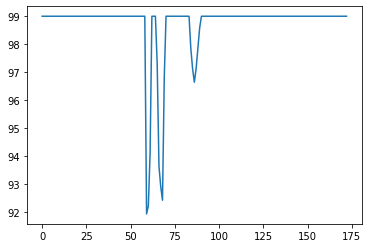

In [13]:
df = get_event_hist_data(12358)
print(df["yesfp"].std())
df["yesfp"].plot()